## This notebook focuses on two main objectives:

### 1. Accelerating Decision Making: Building a new feature to enhance artist recommendation.
### 2. Impact of NLP Entity Resolution: Demonstrating improvements in recommendations through named entity resolution for semantically-equivalent names.

In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = f"{os.getcwd()}/data"

In [3]:
df = pd.read_csv(f"{data_dir}/spotify_dataset.csv",
                    skiprows=1,
                    names=['user_id', 'artistname', 'trackname', 'playlistname'],
                    on_bad_lines='skip')
df = df.sample(n=10000, random_state=42)
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 7578551 to 10128040
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       10000 non-null  object
 1   artistname    9970 non-null   object
 2   trackname     10000 non-null  object
 3   playlistname  9999 non-null   object
dtypes: object(4)
memory usage: 390.6+ KB
None


,user_id,artistname,trackname,playlistname
7578551,5c2b840d66d02ac7aa6a069eddd17f48,Spice Girls,Wannabe - Radio Edit,Lol HiGh Sk00l MeMorIeZ
911963,6da651f45aac18e5da52433aa3c38947,Flying Lotus,Descent Into Madness (feat. Thundercat),Best of 2014
8049506,20350023c94899ce25cd1a86ea385853,Kristin Hersh,Your Ghost,Ladies. All the ladies.
11247838,f9809d1afbab1b0aaa0c2f678a90752a,Rotary Connection,This Town,To listen to
6160700,db9646b77f3a677040b9140489da16f1,Bastille,Pompeii,Starred


In [4]:
df.describe()

,user_id,artistname,trackname,playlistname
count,10000,9970,10000,9999
unique,5019,5696,9347,6640
top,4398de6902abde3351347b048fcdc287,The Rolling Stones,Mercy,Starred
freq,210,28,6,1017


In [5]:
# null values in dataframe
df.isnull().sum()

user_id          0
artistname      30
trackname        0
playlistname     1
dtype: int64

In [6]:
df[df['artistname'].isnull()]

,user_id,artistname,trackname,playlistname
10582452,9b0cb216778138cc481d17dee58a0319,NaN,avicii vs nicky romero - i could be the one (n...,Bautizo
10366650,93000d9cad22c61869db84fb96c8b5c9,NaN,Animal Crossing New Leaf - 12 PM (Extended),Animal Crossing
8186225,c8e0b3f55f4ecd3c0c7947a18e7472d8,NaN,16 - Joni Mitchell - Both Sides Now - www.torr...,MMM
3642727,74bc80e9a16ccd15a85f8d4d871000cf,NaN,Gee - SNSD,Osu!
8516423,67bb38768667210fe57b985c96f5fa4c,NaN,Ben Pearce - What I Might Do (Kilter Remix),1 wintah starred 14'
7512326,c738ccdf6921c156a815e9fa9f8b9dd9,NaN,Spor 08,BCN 06
7827501,2801dbeaa27d88758fc964e70b64f7bc,NaN,Gonzales - Z - 13 - Let's Groove Again ft. Lou...,Gregory Gray’s iPod Selection
6767682,c6f591538735f1c7c25964edfcbe81b8,NaN,Dio - Holy Diver - drumless,drumless
1447006,cba662ee7038612852220efd5730e616,NaN,Kaleido Star Op2,Anime
5036191,14d4bc2cb64c89d7180421e93afc271a,NaN,16 ANOCHECE.mp3,musica


In [7]:
# drop nulls
df.dropna(inplace=True)

In [8]:
# duplicates
df[df.duplicated()]

,user_id,artistname,trackname,playlistname


## Exploratory Data Analysis

#### This dataset doesn't provide repeat of track/s, but merely tracks that have been played, and metadata like playlist and artistname the track belongs to! 
### Opportunity to learn more about user-artist preference. 

In [9]:
# artist frequently played by user
df.groupby(['user_id', 'artistname'], as_index=False
          )['trackname'].count().sort_values(by=['trackname'], ascending=False)

,user_id,artistname,trackname
5566,8c3e1191cb28f7c57bbf35c1e2ad1bf1,Aretha Franklin,5
1422,26b51e580277e131f87e4c7ee4c0887a,Vitamin String Quartet,5
9620,fa6ec384798989855ad898e6b8c68c3b,John Williams,4
2471,414050deadb38aafd8d4ad22ca634055,Vitamin String Quartet,4
6422,a251c8204b5bc479dc5c83c15b7cc929,The Rolling Stones,3
...,...,...,...
3293,53f433aeae7d61e5e977a61342a92740,Duke Ellington,1
3294,54174df459c3780a3251a9ce6506db09,Sam Smith,1
3295,541a9ceaaf98e45954894532ec57f30b,The Decemberists,1
3296,543d13a267c4f91c511fdaf97a13f86b,Grises,1


In [10]:
# track making into different playlist
df.groupby(['artistname', "trackname"], as_index=False
          )['playlistname'].nunique().sort_values(by=['playlistname'], ascending=False)

,artistname,trackname,playlistname
2641,Eminem,Lose Yourself - Soundtrack Version,4
7030,Rihanna,We Found Love,4
615,Avicii,Hey Brother,4
7076,Robin Thicke,Blurred Lines,4
5735,Modest Mouse,Float On,4
...,...,...,...
3257,Good Knight Productions,Sonic Adventure 2 - Way to the Base,1
3258,Goran Bregovic,RUŽICA,1
3259,Gordon Lightfoot,Beautiful,1
3260,Gorguts,Le toit du monde,1


In [11]:
# count of artist by playlist
df.groupby(['playlistname'], as_index=False
          )['artistname'].nunique().sort_values(by=['artistname'], ascending=False)

,playlistname,artistname
4739,Starred,868
2955,Liked from Radio,130
1874,Favoritas de la radio,26
201,2013,23
1198,Christmas,20
...,...,...
2363,How To Dress Well – Total Loss,1
2362,How To Disappear Completely,1
2361,How I Met Your Mother (music from the show),1
2360,House on SOUNDROP,1


## Preprocessing artist name 

### text normalization

In [12]:
import re
# Function to normalize text
def normalize(text):
    text = text.lower() 
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r"[.'’]", '', text)  # Remove punctuation
    text = re.sub(r'^(the|a)\s+', '', text) # Remove the, a from start of the text
    return text

# Normalize all artist names
df['normalized_artistname'] = df['artistname'].apply(normalize)
df

,user_id,artistname,trackname,playlistname,normalized_artistname
7578551,5c2b840d66d02ac7aa6a069eddd17f48,Spice Girls,Wannabe - Radio Edit,Lol HiGh Sk00l MeMorIeZ,spice girls
911963,6da651f45aac18e5da52433aa3c38947,Flying Lotus,Descent Into Madness (feat. Thundercat),Best of 2014,flying lotus
8049506,20350023c94899ce25cd1a86ea385853,Kristin Hersh,Your Ghost,Ladies. All the ladies.,kristin hersh
11247838,f9809d1afbab1b0aaa0c2f678a90752a,Rotary Connection,This Town,To listen to,rotary connection
6160700,db9646b77f3a677040b9140489da16f1,Bastille,Pompeii,Starred,bastille
...,...,...,...,...,...
4892779,529f12438bfbfc2c67a15cb1bc915e26,Agaric,No Way I Know I Feel - Axel Boman Remix,Ovum Recordings,agaric
9544566,ce1ac1277e6abbe4b232f8e92b83fbdf,2Pac,Got My Mind Made Up,truckin,2pac
2682421,4cecda8e0ebdcc4c664aa3598a35c43b,James Curd,A Friend,NuDisco/ObscureDisco/House/DeepHouse/IndieDance,james curd
11586113,658159ed7b84bf407b1edd7bf7ce30c8,DJ Jump,On My Own,Various Artists – 101 Baladas del Pop,dj jump


### Named Entity Resolution (NER) for semantically-equivalent names 

In [13]:
import difflib
def cleanup_dict(equivalent_names):
    new_equivalent_names = {}
    repeatative_names = []
    for k, v in equivalent_names.items():
        if k in repeatative_names:
            continue
        new_equivalent_names[k] = v
        repeatative_names.extend(v)
    return new_equivalent_names

def find_equivalent_names(list_artists):
    equivalent_names = {}
    for artist in list_artists:
        matches = difflib.get_close_matches(artist, list_artists, 
                                            n=5, cutoff=0.7
                                           ) #manage cutoff to get closest match based on requirement
        if len(matches) > 1:
            equivalent_names[artist] = matches
    return equivalent_names

equivalent_artist_names = cleanup_dict(
                            find_equivalent_names([str(n) for n in df['normalized_artistname'].unique()])
                        )

# print first 30 items from dictionary
i = 0
for k, v in equivalent_artist_names.items():
    print(k, v)
    i += 1
    if i == 30:
        break

spice girls ['spice girls', 'cheap girls']
kristin hersh ['kristin hersh', 'kristin chenoweth']
bastille ['bastille', 'stills', 'ballet', 'bagatelle']
skillet ['skillet', 'skrillex', 'killers']
since october ['since october', 'spin doctors', 'blue october']
linkin park ['linkin park', 'clinton sparks']
blur ['blur', 'blu', 'blue']
16volt ['16volt', '16 volt']
crystal castles ['crystal castles', 'crystal stilts', 'crystal fighters']
hives ['hives', 'givers']
andrew bird ['andrew bird', 'andrew ripp', 'andrew gold', 'new breed']
bongwater ['bongwater', 'ben walther']
bravery ['bravery', 'ralvero']
train ['train', 'trini', 'travis', 't-pain', 't pain']
snow patrol ['snow patrol', 'soul patrol']
black books ['black books', 'bad books', 'black rose', 'black kids', 'black keys']
future islands ['future islands', 'futureheads']
cars ['cars', 'mc lars', 'caesars']
soundgarden ['soundgarden', 'sound nomaden']
ryan adams ['ryan adams', 'bryan adams']
rancid ['rancid', 'acid', 'ramoncin']
dash be

## This self-identified list of semantically-equivalent artist names is intended for merging into single named entities. 

## With input from subject matter experts like content editors, the list can become more precise and accurate, enhancing model performance and reliability

In [14]:
# Identified artistnames that are semantically equivalent to be merged into a single named entity.
# With expert's knowledge we can create an accurate and 
semantically_equivalent_artistnames = {'16 volt':'16volt',
 '30 seconds to mars':'thirty seconds to mars',
 'b dylan': 'bob dylan',
 'dave matthews band':'dave matthews',
 'bjork': 'björk',
 'jay z': 'jay-z',
 'paul mccartney & wings':'paul mccartney',
  'original motion picture soundtrack':'motion city soundtrack',
 'macklemore & ryan lewis ft mary lambert': 'macklemore & ryan lewis',
 'imogen heap':'imagen heap',
 'pat metheny group':'pat metheny',
 'guns and roses':'guns n roses', 
 'belle & sebastian':'belle and sebastian',
 'sylvan':'sylvan esso',
 'william fitzsimmons & michael flynn':'william fitzsimmons',
 'drumsound & bassline smith': 'drumsound & bassline',
 'oscar de leon' : 'oscar dleón',
 'london symphony orchestra': 'london philharmonic orchestra',
  'relaxing piano music': 'relaxing piano music consort', 
 'florence + the machine': 'florence and the machine',
 'hans zimmer & james newton howard': 'james newton howard',
 'led zepagain': 'led zeppelin',
 'coheed & cambria': 'coheed and cambria',
 'beyonce ft jay z' : 'beyonce',
 'beyonce feat kanye west' : 'beyonce',
 'simon & garfunkel': 'simon and garfunkel', 
 'oscar peterson trio': 'oscar peterson',
 'dave brubeck':'dave brubeck quartet',
 'rocío dúrcal': 'rocio durcal',  
 'joaquin sabina':'joaquín sabina',
 'ray barretto': 'ray barreto',
 'kenny garrett quintet': 'kenny garrett',
 'elvis costello and the brodsky quartet' : 'elvis costello' ,
 'elvis costello & the imposters' : 'elvis costello',
 'elvis costello & the attractions' : 'elvis costello' ,
 'various artists - abba tribute': 'various artists - the eagles tribute',
}

In [52]:
# Replace artistname to it's semantically equivalent. Reducing noise.
df['semantical_equivalent_normalized_artistname'] = df['normalized_artistname'].apply(
    lambda x: semantically_equivalent_artistnames[x] if x in semantically_equivalent_artistnames else x)

# print
df[df['semantical_equivalent_normalized_artistname'].isin(semantically_equivalent_artistnames.values())
  ].groupby(['semantical_equivalent_normalized_artistname','normalized_artistname']).count().head(20)

user_id  \
semantical_equivalent_normalized_artistname normalized_artistname                       
16volt                                      16 volt                                 1   
                                            16volt                                  1   
belle and sebastian                         belle & sebastian                      11   
                                            belle and sebastian                     2   
beyonce                                     beyonce feat kanye west                 1   
                                            beyonce ft jay z                        1   
björk                                       bjork                                   1   
                                            björk                                   2   
bob dylan                                   b dylan                                 1   
                                            bob dylan                              18   
coheed and cambria                          coheed & cambria                        2   
                                            coheed and cambria                      1   
dave brubeck quartet                        dave brubeck                            2   
                                            dave brubeck quartet                    1   
dave matthews                               dave matthews                           2   
                                            dave matthews band                     17   
drumsound & bassline                        drumsound & bassline                    1   
                                            drumsound & bassline smith              1   
elvis costello                              elvis costello                          4   
                                            elvis costello & the attractions        1   

                                                                              artistname  \
semantical_equivalent_normalized_artistname normalized_artistname                          
16volt                                      16 volt                                    1   
                                            16volt                                     1   
belle and sebastian                         belle & sebastian                         11   
                                            belle and sebastian                        2   
beyonce                                     beyonce feat kanye west                    1   
                                            beyonce ft jay z                           1   
björk                                       bjork                                      1   
                                            björk                                      2   
bob dylan                                   b dylan                                    1   
                                            bob dylan                                 18   
coheed and cambria                          coheed & cambria                           2   
                                            coheed and cambria                         1   
dave brubeck quartet                        dave brubeck                               2   
                                            dave brubeck quartet                       1   
dave matthews                               dave matthews                              2   
                                            dave matthews band                        17   
drumsound & bassline                        drumsound & bassline                       1   
                                            drumsound & bassline smith                 1   
elvis costello                              elvis costello                             4   
                                            elvis costello & the attractions           1   

                                                                              trackname  \
sem

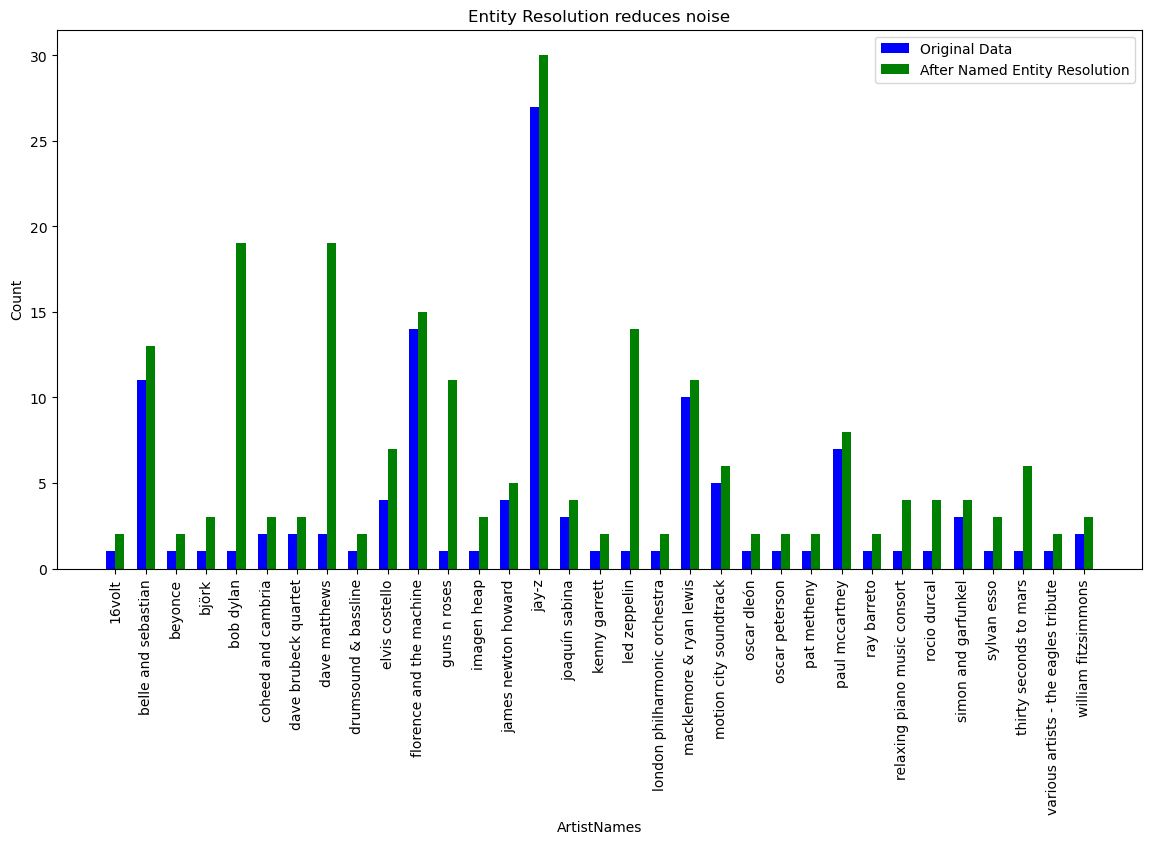

In [54]:
# entity list identified as semantically equivalent
artistname_semtanically_equi = list(df_artistnames_semantically_equ.groupby('semantical_equivalent_normalized_artistname'
                                                                           )['normalized_artistname'].first().reset_index()['normalized_artistname'])
artistname_entity = list(df_artistnames_semantically_equ['semantical_equivalent_normalized_artistname'].unique())



# Count the occurrences of each entity before and after NER
original_counts = df['normalized_artistname'][df['normalized_artistname'].isin(artistname_semtanically_equi)
                                ].value_counts().reindex(artistname_semtanically_equi)

after_ner_counts = df['semantical_equivalent_normalized_artistname'][df['semantical_equivalent_normalized_artistname'].isin(artistname_entity)
                                ].value_counts().reindex(artistname_entity)



r = np.arange(len(artistname_entity)) 
width = 0.3

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(14, 7))
plt.bar(r , original_counts.tolist(), color='b', width = width, label='Original Data')
plt.bar(r + width, after_ner_counts.tolist(), color='g', width = width, label='After Named Entity Resolution')

plt.xticks(r + width/2, artistname_entity, rotation=90)
plt.xlabel('ArtistNames')
plt.ylabel('Count')
plt.title('Entity Resolution reduces noise')
plt.legend() 
plt.show()

## User-Artist Interaction Matrix

In [57]:
# named entity resolution - user artist matrix 
user_artist_ner_matrix = df.groupby(['user_id', 'semantical_equivalent_normalized_artistname']
                               )['semantical_equivalent_normalized_artistname'].count().unstack().reset_index().fillna(0)
user_artist_ner_matrix.set_index('user_id', inplace=True)

# user artist matrix 
user_artist_matrix = df.groupby(['user_id', 'normalized_artistname']
                               )['normalized_artistname'].count().unstack().reset_index().fillna(0)
user_artist_matrix.set_index('user_id', inplace=True)                             

In [58]:
print(f"Applying Named Entity Resolution reducing dimensionality {len(user_artist_matrix.columns)}\
 to {len(user_artist_ner_matrix.columns)} ")

Applying Named Entity Resolution reducing dimensionality 5665 to 5630 


##### Techniques like K-means, DBScan will not yield meaningful result with sparse feature unless we further apply dimensionality reduction.
## User-based collaborative filtering

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

similar_users_dict = {}

def user_cosine_similarity(user_artist_matrix):
    
    # Compute the cosine similarity between users
    user_similarity = cosine_similarity(user_artist_matrix)
    # Create a DataFrame for user similarity
    df_user_similarity = pd.DataFrame(user_similarity, index=user_artist_matrix.index, columns=user_artist_matrix.index)
    return df_user_similarity

def recommend_top_artists(user_id, df_user_similarity, user_artist_matrix, similar_users = 5, top_artist = 10):
    def get_top_n_similar_users(user_id, n):
        list_similar_users = df_user_similarity[user_id].sort_values(ascending=False).head(n+1).index.tolist()
        if user_id in list_similar_users:
            list_similar_users.remove(user_id)
            
        return list_similar_users
    
    list_similar_users = get_top_n_similar_users(user_id, similar_users)
    artist_scores = user_artist_matrix.loc[list_similar_users].mean(axis=0)
    top_artists = artist_scores.sort_index().sort_values(ascending=False).head(top_artist).index.tolist()
    return list_similar_users, top_artists


user_id = '0025022960e5f0d7d01af5d840014594'
matrix = user_artist_matrix
list_similar_users, top_artists = recommend_top_artists(user_id, user_cosine_similarity(matrix), matrix,
                                    similar_users = 5, top_artist = 3
                                   )
print(f"Top 10 artist recommendations for user {user_id}: {top_artists}")

Top 10 artist recommendations for user 0025022960e5f0d7d01af5d840014594: ['robbie williams', 'english chamber orchestra, conducted by jeffrey tate', 'jethro tull']


### Example : Analyze difference in before recommendation vs NER recommandation

In [65]:
user_id = '5c2b840d66d02ac7aa6a069eddd17f48'
top_artist = 5
similar_users = 5

matrix = user_artist_matrix
list_similar_users, top_artists = recommend_top_artists(user_id, user_cosine_similarity(matrix), matrix,
                                    similar_users = similar_users, top_artist = top_artist
                                   )
print(f"Top {top_artist} artist recommendations for user {user_id} : \n {top_artists} \n")
print(f"Here are the {similar_users} similar users \n \t {list_similar_users}")
for u in list_similar_users:
    print(f"\t Artist frequented by {u}: \n \
            {user_artist_matrix.loc[u].sort_index().sort_values(ascending=False).head(top_artist).index.tolist()} ")

    
print('\n')
print('---------------- Improved Recommendation with Entity Resolution ---------------------------------------------- \n')
matrix = user_artist_ner_matrix
list_similar_users_ner, top_artists_ner = recommend_top_artists(user_id, user_cosine_similarity(matrix), matrix,
                                    similar_users = similar_users, top_artist = top_artist
                                   )
print(f"Top {top_artist} NER artist recommendations for user {user_id} : \n {top_artists_ner} \n")
print(f"Here are the {similar_users} similar users \n \t {list_similar_users_ner}")
for u in list_similar_users_ner:
    print(f"\t Artist frequented by {u}: \n \
        {user_artist_ner_matrix.loc[u].sort_index().sort_values(ascending=False).head(top_artist).index.tolist()}")


Top 5 artist recommendations for user 5c2b840d66d02ac7aa6a069eddd17f48 : 
 ['spice girls', 'jay-z', 'jack johnson', 'lil wayne', 'pretty lights'] 

Here are the 5 similar users 
 	 ['7017180d62cb57488fc8bb058b3c3a8e', '4fe4a15f91a6ac37af77dfee99e11957', '01ad7fc79498ab698b3f0e0f2c5c818e', 'ac08669f9d162aea8a4c599f311ef979', 'abfe2c0cc529a4cf5513604c1e422e83']
	 Artist frequented by 7017180d62cb57488fc8bb058b3c3a8e: 
             ['spice girls', '+/-', 'ne-yo', 'naughty by nature', 'naughty boy'] 
	 Artist frequented by 4fe4a15f91a6ac37af77dfee99e11957: 
             ['fleetwood mac', 'spice girls', '+/-', 'ne-yo', 'naughty by nature'] 
	 Artist frequented by 01ad7fc79498ab698b3f0e0f2c5c818e: 
             ['pretty lights', 'avicii', 'lil wayne', 'glee cast', 'deadmau5'] 
	 Artist frequented by ac08669f9d162aea8a4c599f311ef979: 
             ['mumford & sons', '+/-', 'natalie imbruglia', 'ndidi o', 'naughty by nature'] 
	 Artist frequented by abfe2c0cc529a4cf5513604c1e422e83: 
         

### get top artist recommendation for all users

In [61]:
user_top_artists_recommendation = {}

df_user_cosine_similarity = user_cosine_similarity(user_artist_matrix)

df_user_ner_cosine_similarity = user_cosine_similarity(user_artist_ner_matrix)

similar_users = 5
top_artist = 3
for user_id in df.user_id:
    user_top_artists_recommendation[user_id] = []
    list_similar_users, top_artists = recommend_top_artists(user_id, df_user_cosine_similarity, user_artist_matrix,
                                    similar_users = similar_users, top_artist = top_artist 
                                   )
    user_top_artists_recommendation[user_id].append(top_artists)
    
    # ner 
    list_similar_users, top_ner_artists = recommend_top_artists(user_id, df_user_ner_cosine_similarity, user_artist_ner_matrix,
                                similar_users = similar_users, top_artist = top_artist 
                               )
    user_top_artists_recommendation[user_id].append(top_ner_artists)

In [66]:
df_top_artist_recommendation = pd.DataFrame.from_dict(user_top_artists_recommendation,orient='columns').transpose()
df_top_artist_recommendation.columns=['top artist recommendation','Improved - entity Resolution top artist recommendation']

df_top_artist_recommendation.head(50)

,top artist recommendation,Improved - entity Resolution top artist recommendation
5c2b840d66d02ac7aa6a069eddd17f48,"[spice girls, jay-z, jack johnson]","[spice girls, jerry lee lewis, joe nichols]"
6da651f45aac18e5da52433aa3c38947,"[flying lotus, miles davis, minutemen]","[flying lotus, miles davis, evian christ]"
20350023c94899ce25cd1a86ea385853,"[robbie williams, english chamber orchestra, c...","[black crowes, hallé orchestra, english chambe..."
f9809d1afbab1b0aaa0c2f678a90752a,"[arcade fire, nine inch nails, john butler trio]","[arcade fire, nine inch nails, john butler trio]"
db9646b77f3a677040b9140489da16f1,"[bastille, +/-, natalie grant]","[bastille, +/-, natalie imbruglia]"
7ee6797934d627b54a72dda785b1ea85,"[dinosaur jr, jack white, jerry goldsmith]","[dinosaur jr, jerry goldsmith, tame impala]"
5c4438bac13e50d6db5058ad0b0983da,"[joni mitchell, jamie cullum, alt-j]","[joni mitchell, pat metheny, jamie cullum]"
705e46c3ff12a665e14ab67c497f18ac,"[rolling stones, ella fitzgerald, mannheim ste...","[rolling stones, frank sinatra, skillet]"
ec4faa478b43b87aa990f5f2b7d0f414,"[nine inch nails, beck, frank zappa]","[nine inch nails, eric clapton, frank zappa]"
500e8b67136775d227d35a1bb37478aa,"[awolnation, darkside, clint mansell]","[awolnation, first aid kit, darkside]"


In [69]:
print('Total Users' , len(df_top_artist_recommendation.index))

per_users_artist_recom_impacted = round(len(
                                    np.where(
                                        (df_top_artist_recommendation['top artist recommendation'] != df_top_artist_recommendation['Improved - entity Resolution top artist recommendation'])
                                    )[0])*100/len(df_top_artist_recommendation.index),2)

print()
print('--------------------------------------------------------------------------- \n ')
print(f"\t {per_users_artist_recom_impacted}% user's recommendation improved with Entity Resolution")
print('\n---------------------------------------------------------------------------')

Total Users 5009

--------------------------------------------------------------------------- 
 
	 82.93% user's recommendation improved with Entity Resolution

--------------------------------------------------------------------------


# -------------------------------------------------------------------------------------

### Next steps or challenges:
#### - Limited data. Data Collection like 
    1. Content data 
        song metadata such as release year and duration
        attributes of songs such as tempo, key, loudness, modesuch as tempo, genre, mood
    
    2. User data
        interaction data: skips, likes, dislikes, shares, and playlist additions.
        search queries: search terms users use to find music.
##### - Working with larger volume of data. 
##### - Editorial input in artist name - Named Entity Resolution would further improve this feature thereby model's performance